In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# 1. cur과 vib의 통합

In [4]:
cur_normal = pd.read_csv('2.2kW_cur_L-DSF-01_training_with_label.csv')
vib_normal = pd.read_csv('2.2kW_vib_L-DSF-01_training_with_label.csv')
cur_validation = pd.read_csv('2.2kW_cur_L-DSF-01_validation_with_label.csv')
vib_validation = pd.read_csv('2.2kW_vib_L-DSF-01_validation_with_label.csv')

print(len(cur_normal), type(cur_normal))
print(len(vib_normal))
print(len(cur_validation))
print(len(vib_validation))

36768 <class 'pandas.core.frame.DataFrame'>
24487
4599
3064


In [5]:
np_cur_normal = cur_normal.to_numpy()
np_vib_normal = vib_normal.to_numpy()
np_cur_validation = cur_validation.to_numpy()
np_vib_validation = vib_validation.to_numpy()

# Extract Labels

In [6]:
normal_cur_labels = np_cur_normal[:,-1]
normal_vib_labels = np_vib_normal[:,-1]
val_cur_labels = np_cur_validation[:, -1]
val_vib_labels = np_vib_validation[:, -1]

print(type(normal_cur_labels),normal_cur_labels)
print(normal_vib_labels)
print(val_cur_labels)
print(val_vib_labels)

<class 'numpy.ndarray'> [0 0 0 ... 3 3 3]
[0 0 0 ... 3 3 3]
[0 0 0 ... 3 3 3]
[0 0 0 ... 3 3 3]


In [7]:
cur_normal_dropped = cur_normal.drop(columns = ['Date','WATT','LABEL'])
vib_normal_dropped = vib_normal.drop(columns = ['Date','WATT','LABEL'])
cur_validation_dropped = cur_validation.drop(columns = ['Date','WATT','LABEL'])
vib_validation_dropped = vib_validation.drop(columns = ['Date','WATT','LABEL'])

In [8]:
cur_normal_dropped.head(3)

,R_AbsMax,S_AbsMax,T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,S_P2P,T_P2P,R_RMS,...,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x
0,3.403320,3.123047,4.043945,2.057587,1.889543,2.245951,6.726562,6.166016,7.607422,2.296682,...,0.014614,3.282771,3.058104,3.579351,0.022117,0.019693,0.023455,0.031669,0.027953,0.024256
1,3.283203,3.083008,4.003906,2.059709,1.883498,2.254960,6.526367,6.005859,7.487305,2.287841,...,0.015374,3.433224,3.183656,3.761500,0.013864,0.011091,0.014099,0.030992,0.039196,0.035626
2,3.283203,3.083008,3.963867,2.059209,1.884539,2.255280,6.526367,6.085938,7.407227,2.288444,...,0.019783,3.432319,3.184894,3.755824,0.022333,0.019714,0.020837,0.024400,0.026358,0.023356


In [9]:
vib_normal_dropped.head(3)

,AbsMax,AbsMean,P2P,RMS,Skewness,Kurtosis,Crest,Shape,Impulse,1x,2x,3x,4x,1xB,2xB,3xB,4xB
0,0.052886,0.004459,0.071972,0.005718,-0.438530,4.491689,12.587725,1.282149,11.859366,0.001678,0.002248,0.001469,0.002217,0.000414,0.000677,0.000280,0.000264
1,0.045940,0.004400,0.065973,0.005704,-0.610259,5.239334,11.566962,1.296319,10.441389,0.002351,0.001282,0.001054,0.002149,0.001089,0.000716,0.000539,0.000422
2,0.065577,0.004383,0.083307,0.005693,-0.770679,7.921089,14.634132,1.298942,14.963328,0.001837,0.001834,0.000904,0.002094,0.000756,0.000304,0.000474,0.000251


In [13]:
cur_normal_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36768 entries, 0 to 36767
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   R_AbsMax    36768 non-null  float64
 1   S_AbsMax    36768 non-null  float64
 2   T_AbsMax    36768 non-null  float64
 3   R_AbsMean   36768 non-null  float64
 4   S_AbsMean   36768 non-null  float64
 5   T_AbsMean   36768 non-null  float64
 6   R_P2P       36768 non-null  float64
 7   S_P2P       36768 non-null  float64
 8   T_P2P       36768 non-null  float64
 9   R_RMS       36768 non-null  float64
 10  S_RMS       36768 non-null  float64
 11  T_RMS       36768 non-null  float64
 12  R_Skewness  36768 non-null  float64
 13  S_Skewness  36768 non-null  float64
 14  T_Skewness  36768 non-null  float64
 15  R_Kurtosis  36768 non-null  float64
 16  S_Kurtosis  36768 non-null  float64
 17  T_Kurtosis  36768 non-null  float64
 18  R_Crest     36768 non-null  float64
 19  S_Crest     36768 non-nul

In [14]:
vib_normal_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24487 entries, 0 to 24486
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AbsMax    24487 non-null  float64
 1   AbsMean   24487 non-null  float64
 2   P2P       24487 non-null  float64
 3   RMS       24487 non-null  float64
 4   Skewness  24487 non-null  float64
 5   Kurtosis  24487 non-null  float64
 6   Crest     24487 non-null  float64
 7   Shape     24487 non-null  float64
 8   Impulse   24487 non-null  float64
 9   1x        24487 non-null  float64
 10  2x        24487 non-null  float64
 11  3x        24487 non-null  float64
 12  4x        24487 non-null  float64
 13  1xB       24487 non-null  float64
 14  2xB       24487 non-null  float64
 15  3xB       24487 non-null  float64
 16  4xB       24487 non-null  float64
dtypes: float64(17)
memory usage: 3.2 MB


In [11]:
print(cur_normal_dropped.shape)
print(vib_normal_dropped.shape)

(36768, 45)
(24487, 17)


In [8]:
cur_normal_dropped_np = cur_normal_dropped.to_numpy()
vib_normal_dropped_np = vib_normal_dropped.to_numpy()
cur_validation_dropped_np = cur_validation_dropped.to_numpy()
vib_validation_dropped_np = vib_validation_dropped.to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cur_normal_dropped_np, normal_cur_labels, stratify=normal_cur_labels, test_size=0.2, random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)

print("="*50)

print(y_train.shape)
print(y_test.shape)

print("="*50)

x_valid = cur_validation_dropped_np
y_valid = val_cur_labels

print(x_valid.shape)
print(y_valid.shape)

(29414, 45)
(7354, 45)
(29414,)
(7354,)
(4599, 45)
(4599,)


# 일단 Normalize는 하지 말아보자

시각화 1. 데이터 불균형 확인

In [13]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))  # classes = array([-1,  1])
classes

array([0, 3], dtype=object)

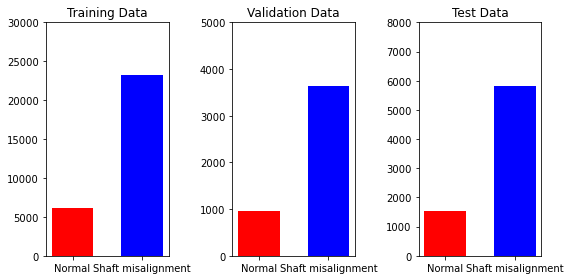

In [22]:
# Class의 종류 확인: 정상 1, 비정상 -1
x = np.arange(len(classes))  # Plot의 X축의 개수 구하기
#labels = ["Abnormal", "Normal"]   # Plot의 X축의 이름 구하기
labels = ["Normal", "Shaft misalignment"]   # Plot의 X축의 이름 구하기

values_train = [(y_train == i).sum() for i in classes]  # Train 데이터의 정상/비정상 각 총 개수
values_valid = [(y_valid == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수
values_test = [(y_test == i).sum() for i in classes]  # Test 데이터의 정상/비정상 각 총 개수

plt.figure(figsize=(8,4))  # Plot 틀(Figure)의 Size 설정 (5X3)

plt.subplot(1,3,1)   # Plot 틀(Figure) 내 3개의 subplot 중 첫 번째(왼쪽) 지정
plt.title("Training Data")  # subplot 제목
plt.bar(x, values_train, width=0.6, color=["red", "blue"])  # Train 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 30000])
plt.xticks(x, labels)  # X축에 변수 기입

plt.subplot(1,3,2)  # Plot 틀(Figure) 내 3개의 subplot 중 두 번째(가운데) 지정
plt.title("Validation Data")
plt.bar(x, values_valid, width=0.6, color=["red", "blue"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 5000])
plt.xticks(x, labels)  

plt.subplot(1,3,3)  # Plot 틀(Figure) 내 3개의 subplot 중 세 번째(오른쪽) 지정
plt.title("Test Data")
plt.bar(x, values_test, width=0.6, color=["red", "blue"])  # Test 데이터의 정상/비정상 개수 BarPlot
plt.ylim([0, 8000])
plt.xticks(x, labels)

plt.tight_layout()  # 그림 저장
plt.savefig('data_imbalance.png', dpi=100, bbox_inches='tight')  # 그림 저장
plt.show()  # 그림 출력

시각화2 .특정 시간에서의 시계열 샘플을 플롯

# Validation도 Scale을 맞춰줘야겠지??

# 2. normalize

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Standard Scaler를 적용하고 싶을 경우 아래 Code를 실행

stder = StandardScaler()
stder.fit(x_train)

x_train = stder.transform(x_train)
x_valid = stder.transform(x_valid)

# Robust Scaler를 적용하고 싶을 경우 아래 주석을 해제하고 Code를 실행

# rscaler = RobustScaler() 
# rscaler.fit(x_train)
# x_train = rscaler.transform(x_train)
# x_valid = rscaler.transform(x_valid)

본 데이터는 Multivariate이며, 1개의 Channel만 갖는다. 우리는 multivariate variable with one channel 형태로 바꿔주고자 하며, 이는 아래와 같다.

In [48]:
# CNN, RNN 모델의 입력 변수는 채널 축 1개 차원을 확장시킨 3D Tensor이다.
# 즉 아래 CNN, RNN 모델은 x_train, x_valid, x_test를 입력 변수로 넣지 않고, 
# x_train_exp, x_valid_exp, x_test_exp을 넣는다. 
x_train_exp = np.expand_dims(x_train, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_train
x_valid_exp = np.expand_dims(x_valid, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_vaild 
x_test_exp = np.expand_dims(x_test, -1)  # 채널 축 1개 차원을 확장 시킨(Expand) X_test

# 위와 동일한 코드
# x_train_exp = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
# x_valid_exp = x_train.reshape((x_valid.shape[0], x_valid.shape[1], 1))
# x_test_exp = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print("x_train_exp의 형태:", x_train_exp.shape)
print("x_valid_exp의 형태:", x_valid_exp.shape)
print("x_test_exp의 형태:", x_test_exp.shape)

x_train_exp의 형태: (29414, 45, 1)
x_valid_exp의 형태: (4599, 45, 1)
x_test_exp의 형태: (7354, 45, 1)


label (비정상 -1 또는 정상 1) 값을 Positive Value로 바꿔준다.

In [63]:
type(y_train)

numpy.ndarray

In [65]:
# y_train[y_train == -1] = 0
# y_valid[y_valid == -1] = 0
# y_test[y_test == -1] = 0
y_train[y_train == 3] = 1
y_train = y_train.astype('int')
y_valid[y_valid == 3] = 1
y_valid = y_valid.astype('int')
y_test[y_test == 3] = 1
y_test = y_test.astype('int')

In [66]:
print(y_train)

[0 1 1 ... 0 1 1]


비정상 3 -> 1로 마크?? 이 이작업이 꼭 필요할까?

In [50]:
num_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))
num_classes

2

# 모델구축, 로지스틱 회귀

1. 로지스틱 회귀로 문제 해결 

In [67]:
from sklearn.linear_model import LogisticRegression

clf_lr_1 = LogisticRegression(penalty='l2',
                         tol=0.0001, 
                         C=1, 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         random_state=2, 
                         solver='lbfgs', 
                         max_iter=1000,
                         multi_class='auto',
                         verbose=0)

In [68]:
x_train_lr = np.concatenate((x_train, x_valid), axis=0)  # 로지스틱 회귀 학습용 데이터
y_train_lr = np.concatenate((y_train, y_valid), axis=0)  # 로지스틱 회귀 테스트용 데이터

In [69]:
print(x_train_lr)

[[-0.45620424  0.02795789 -0.31167784 ... -0.19067947 -0.09230915
  -0.06799548]
 [ 0.47273721  0.23174399  0.65784982 ... -0.76493598 -0.51591107
  -0.65871389]
 [-0.38653363 -0.45603411 -0.04909743 ... -0.37383163 -0.26102343
  -0.29077006]
 ...
 [ 0.28694892 -0.37961432 -0.1500899  ... -0.08884138 -0.25235227
  -0.42474281]
 [ 0.28694892 -0.17582822 -0.1500899  ... -0.3041877  -0.41399564
  -0.38198629]
 [ 0.10116063 -0.17582822 -0.1500899  ...  1.27789068  1.30838831
   1.32614217]]


In [70]:
clf_lr_1.fit(x_train_lr, y_train_lr)

LogisticRegression(C=1, max_iter=1000, random_state=2)

In [ ]:
y_pred = clf_lr_1.predict(x_test)
y_pred_proba = clf_lr_1.predict_proba(x_test)

In [ ]:
score = clf_lr_1.score(x_test, y_test)
print("%s: %.2f%%" % ("Logistic Regression Prediction Rate", score*100))

2. XGBoost

In [71]:
#!pip install xgboost
from xgboost import XGBClassifier

"""
# 반드시 튜닝해야할 파라미터는  min_child_weight / max_depth / gamma
"""

xgb = XGBClassifier(
    learning_rate=0.1, 
    n_estimators=500, 
    max_depth=5,
    min_child_weight=3, 
    gamma=0.2, 
    subsample=0.6, 
    colsample_bytree=1.0,
    objective='binary:logistic', 
    nthread=4, 
    scale_pos_weight=1, 
    seed=27)

In [72]:
from sklearn.model_selection import GridSearchCV

# grid search를 하고 싶을 경우 아래 Code를 주석 해제

parameters = {
    "learning_rate" : [0.1, 0.01, 0.001, 0.0001],
   #"eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
      "min_child_weight" : [ 1, 3, 5, 7 ],
      "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4],
      "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
      }

grid = GridSearchCV(xgb,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=5)
grid.fit(
    x_train.squeeze(), 
    y_train, 
    eval_metric="auc", 
    eval_set=[(x_train, y_train), (x_valid, y_valid)], 
    verbose=True)

KeyboardInterrupt: 

In [ ]:
print('Start Training')
xgb.fit(
    x_train, 
    y_train, 
    eval_metric= ['auc', 'error'],
    eval_set=[(x_train, y_train), (x_valid, y_valid)], 
    verbose=True
)

# 3. RNN으로 구현

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense

def make_rnn_model():
    model = Sequential()
    model.add(LSTM(units=256, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

rnn_model = make_rnn_model()

In [78]:
import h5py
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [79]:
EPOCHS = 100
BATCH_SIZE = 64

In [80]:
rnn_model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer='adam', 
                  metrics=["sparse_categorical_accuracy"]
                 )

In [81]:
# callbacks = [ModelCheckpoint('rnn_best_model.h5', 
#                              monitor='val_loss',
#                              save_best_only=True),
#              ReduceLROnPlateau(
#                  monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
#                  ),
#              EarlyStopping(monitor="val_loss", patience=10, verbose=1)
#              ]

In [83]:
history_rnn = rnn_model.fit(
    x_train_exp,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    #callbacks=callbacks,
    validation_data=(x_valid_exp, y_valid),
    verbose=1
)

Epoch 1/100
460/460 [==============================] - 38s 82ms/step - loss: 0.0105 - sparse_categorical_accuracy: 0.9961 - val_loss: 0.0556 - val_sparse_categorical_accuracy: 0.9824
Epoch 2/100
460/460 [==============================] - 41s 88ms/step - loss: 0.0094 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.0435 - val_sparse_categorical_accuracy: 0.9846
Epoch 3/100
460/460 [==============================] - 40s 87ms/step - loss: 0.0081 - sparse_categorical_accuracy: 0.9971 - val_loss: 0.0366 - val_sparse_categorical_accuracy: 0.9876
Epoch 4/100
460/460 [==============================] - 39s 84ms/step - loss: 0.0073 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.0777 - val_sparse_categorical_accuracy: 0.9761
Epoch 5/100
460/460 [==============================] - 38s 83ms/step - loss: 0.0071 - sparse_categorical_accuracy: 0.9973 - val_loss: 0.0484 - val_sparse_categorical_accuracy: 0.9843
Epoch 6/100
460/460 [==============================] - 38s 83ms/step - loss: 0.0067 -

KeyboardInterrupt: 

In [ ]:
# from tensorflow.keras.models import load_model

# rnn_model = tf.keras.models.load_model("rnn_best_model.h5")
# scores = rnn_model.evaluate(x_test_exp, y_test)

# print("\n""Test accuracy", scores[1])
# print("\n""Test loss", scores[0])
# print("%s: %.2f%%" % (rnn_model.metrics_names[1], scores[1]*100))

In [ ]:
rnn_model = history_rnn
scores = rnn_model.evaluate(x_test_exp, y_test)

print("\n""Test accuracy", scores[1])
print("\n""Test loss", scores[0])
print("%s: %.2f%%" % (rnn_model.metrics_names[1], scores[1]*100))

In [ ]:
draw_confusion_matrix(rnn_model, x_test_exp, y_test, "rnn")

In [ ]:
draw_roc(rnn_model, x_test_exp, y_test, "rnn")

In [ ]:
plot_loss_graph(history_rnn, "rnn")

In [ ]:
plot_prediction_graph(history_rnn, "rnn")